# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [196]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [197]:
# Checking the number of mice.
#combined_data["Mouse ID"].unique() #Gives list of all unique Mouse ID's
id_count = len(combined_data['Mouse ID'].unique()) # Gives the count of unique Mouse ID's within list
id_count

249

In [198]:
#combined_data.columns # still working on this one
combined_data['Mouse ID'].value_counts()

Mouse ID
g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: count, Length: 249, dtype: int64

In [199]:
 #dupes = df[df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

dupes = combined_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)
print(dupes)

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool


In [200]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_rows = combined_data[dupes]
duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [201]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dupe_ids = combined_data[combined_data['Mouse ID'] == 'g989']
all_dupe_ids

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [202]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = combined_data[combined_data['Mouse ID'] != 'g989']
cleaned_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [203]:
# Checking the number of mice in the clean DataFrame.
#cleaned_df['Mouse ID'].count() # if it means check the number of mice, meaning ALL mice, then this will give 1880
new_id_count = len(cleaned_data_df['Mouse ID'].unique()) # If it means check number of unique mice, then this will give the correct #
new_id_count

248

## Summary Statistics

In [204]:
cleaned_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [205]:
cleaned_data_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [206]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [207]:
# MEAN
cleaned_data_group_df = cleaned_data_df.groupby('Drug Regimen')
cleaned_data_group_mean = cleaned_data_group_df['Tumor Volume (mm3)'].mean()
cleaned_data_group_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [208]:
# MEDIAN
cleaned_data_group_df = cleaned_data_df.groupby('Drug Regimen')
cleaned_data_group_median = cleaned_data_group_df['Tumor Volume (mm3)'].median()
cleaned_data_group_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [209]:
# VARIANCE
cleaned_data_group_df = cleaned_data_df.groupby('Drug Regimen')
cleaned_data_group_var = cleaned_data_group_df['Tumor Volume (mm3)'].var()
cleaned_data_group_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [210]:
# STANDARD DEVIATION
cleaned_data_group_df = cleaned_data_df.groupby('Drug Regimen')
cleaned_data_group_standev = cleaned_data_group_df['Tumor Volume (mm3)'].std()
cleaned_data_group_standev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [211]:
# SEM
cleaned_data_group_df = cleaned_data_df.groupby('Drug Regimen')
cleaned_data_group_sem = cleaned_data_group_df['Tumor Volume (mm3)'].sem()
cleaned_data_group_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [212]:
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({'Mean Tumor Volume': cleaned_data_group_mean,
                           'Median Tumor Volume': cleaned_data_group_median,
                           'Tumor Volume Variance': cleaned_data_group_var,
                           'Tumor Volume Std. Dev.': cleaned_data_group_standev,
                           'Tumor Volume Std. Err.': cleaned_data_group_sem})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [213]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(Mean='mean', Median='median', Variance='var', Standard_Deviation='std', SEM='sem')

summary_stats

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [214]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
row_chart = cleaned_data_df.groupby('Drug Regimen')
row_counts = row_chart.size()

<Axes: title={'center': 'Total Number of Rows for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

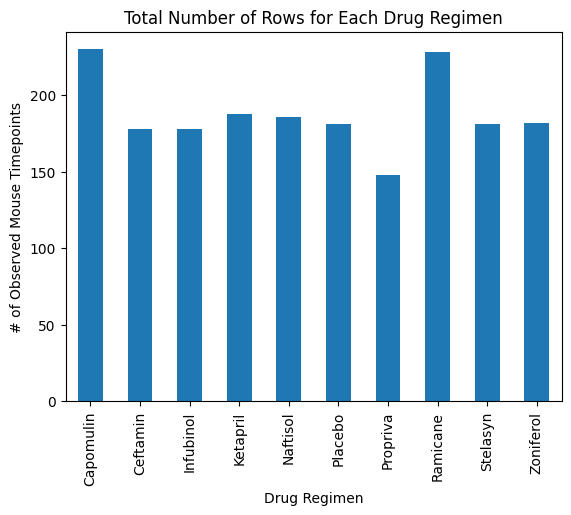

In [215]:
# Plotting the bar chart
row_counts.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints', title='Total Number of Rows for Each Drug Regimen')

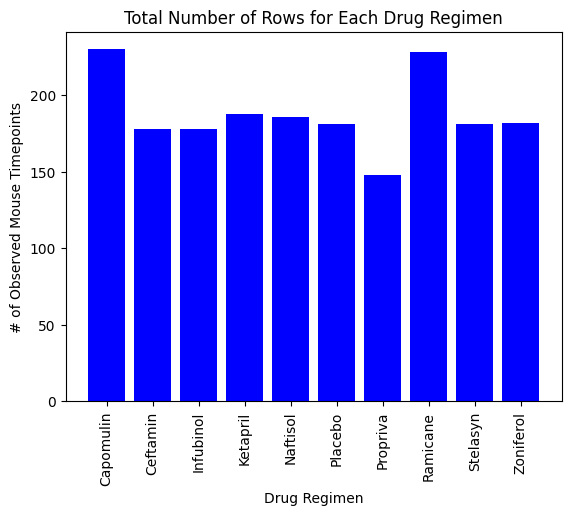

In [216]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
row_counts = cleaned_data_df.groupby('Drug Regimen').size()
x_axis = np.arange(len(row_counts))

plt.bar(x_axis, row_counts, color='b', align='center')

plt.xticks(x_axis, row_counts.index, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')

plt.show()

In [222]:
cleaned_data_df = cleaned_data_df[cleaned_data_df['Sex'].isin(['Male', 'Female'])]
cleaned_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [229]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_data_df['Sex'].value_counts()
#gender_counts = gender_counts.sort_index(ascending=False)
print(gender_counts)

Sex
Male      958
Female    922
Name: count, dtype: int64


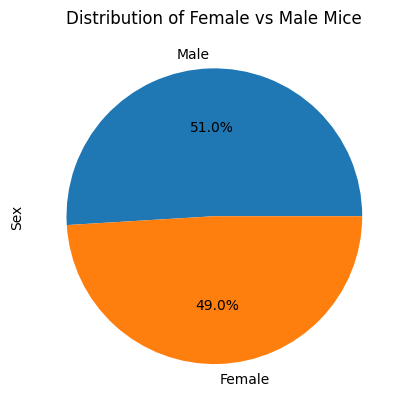

In [251]:
# Generate a pie plot showing the distribution of female versus male mice using 
gender_counts.plot.pie(autopct='%1.1f%%', startangle=1800, ylabel='Sex', title='Distribution of Female vs Male Mice')
plt.show()

In [237]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = cleaned_data_df['Sex'].value_counts()
gender_counts

Sex
Male      958
Female    922
Name: count, dtype: int64

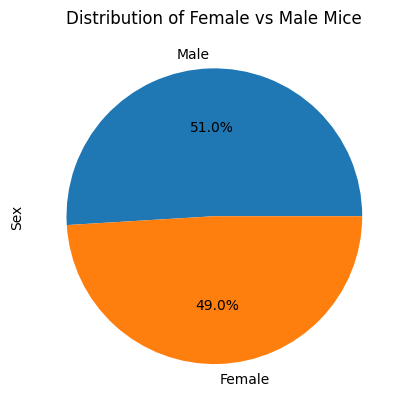

In [252]:
labels = ['Male', 'Female']
sizes = [gender_counts['Male'], gender_counts['Female']]

colors = ['blue', 'orange']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=1800)
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


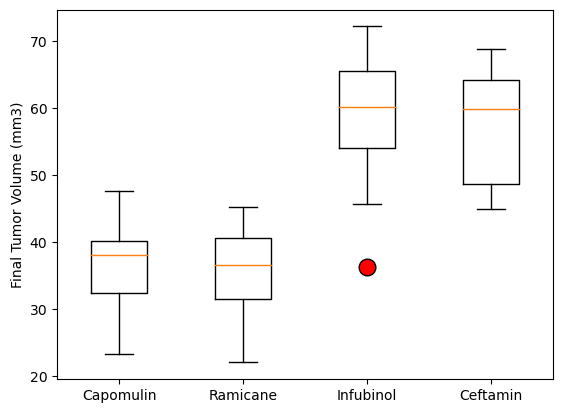

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

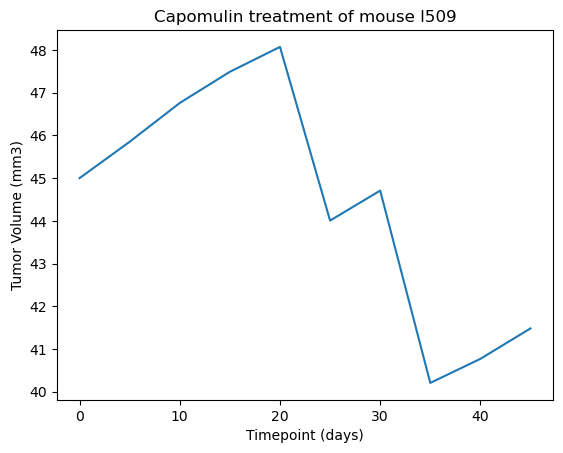

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


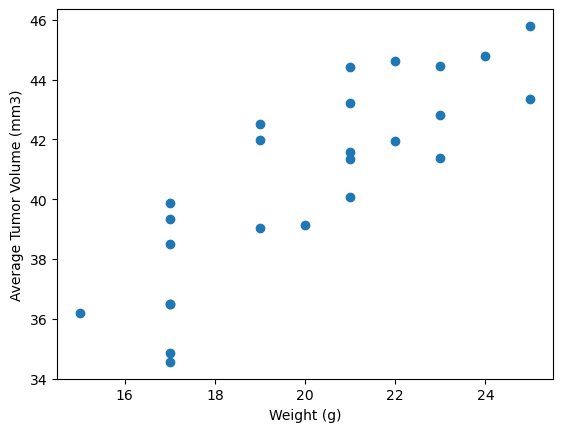

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


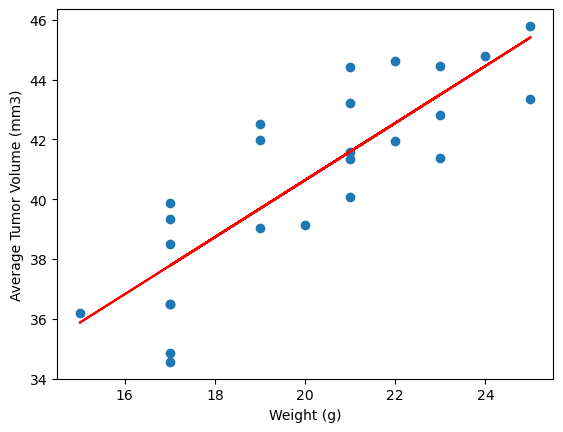

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
